$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

$\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



$f(X) = \begin{bmatrix} x_1 & x_2 \end{bmatrix} . \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} . \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + 2. \begin{bmatrix} 100 & -25 \end{bmatrix} . \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + 10625  $


$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

We can find the min of $f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ wrt $\alpha $ by finding the derivative wrt $\alpha$ and equating to 0\

let $\mathbf{x} - \alpha \nabla f(\mathbf{x}) = \mathbf{z}$\
\
$\frac{df(\mathbf{z})}{d \alpha} = \frac{df(\mathbf{z})}{d\mathbf{z}} \cdot \frac{d\mathbf{z}}{d\alpha}$\
\
$\frac{df(\mathbf{z})}{d\mathbf{z}} = (2A\mathbf{z} +2b)^{T} \qquad (=\nabla f(\mathbf{z})^{T}) (*)$\
\
$\frac{d\mathbf{z}}{d\alpha} = -\nabla f(\mathbf{x})$\
\
$\therefore \frac{df(\mathbf{z})}{d \alpha} = (2A\mathbf{z} +2b)^{T}(-\nabla f(\mathbf{x})) $\
\
$\text{Substituting the value of } \mathbf{z} \text{ and equating to 0,}$\
$(2A(\mathbf{x} - \alpha \nabla f(\mathbf{x})) +2b)^{T}(-\nabla f(\mathbf{x})) = 0$\
$(\mathbf{x}^{T}A - \alpha \nabla f(\mathbf{x})^{T}A + b^{T})\nabla f(\mathbf{x}) = 0$\
$(\mathbf{x}^{T}A  + b^{T})\nabla f(\mathbf{x}) - \alpha \nabla f(\mathbf{x})^{T}A\nabla f(\mathbf{x}) = 0$\
$(\mathbf{x}^{T}A  + b^{T})\nabla f(\mathbf{x}) = \alpha \nabla f(\mathbf{x})^{T}A\nabla f(\mathbf{x})$\
\
$\begin{align}
\text{But, } (\mathbf{x}^{T}A  + b^{T}) &= 0.5(2A\mathbf{x}  + 2b)^{T}\\
 &= 0.5 \nabla f(\mathbf{x})^{T} \qquad \text{from (*)}
 \end{align} $\
\
$0.5\nabla f(\mathbf{x})^{T}\nabla f(\mathbf{x}) = \alpha \nabla f(\mathbf{x})^{T}A\nabla f(\mathbf{x})$\

$\therefore \alpha = \frac{\nabla f(\mathbf{x})^{T}\nabla f(\mathbf{x})}{2\nabla f(\mathbf{x})^{T}A\nabla f(\mathbf{x})}$\
\
n.b. We need not check that it is a minima by 2nd derivative test.since the function is quadratic, it has exactly 1 maxima/minima, and since the value of the function tends to infinity as x1,x2 tend to infinity, we know that it cannot have a maxima. Hence the critical point is a minima.




We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [ ]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 
A = np.array([[1,0],[0,1]])

In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [ ]:
#Complete the module to compute the steplength
def compute_steplength(x): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == 2
  gr = evalg(x)
  step_length = np.matmul(gr,np.transpose(gr))/(2*np.matmul(gr,np.matmul(A,gr.T))) 
  return step_length

In [ ]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x) ,step_length)
  return x,k 


In [ ]:
my_start_x = np.array([10,10])
my_tol= 1e-3
find_minimizer(my_start_x, my_tol)[0]

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0 0.5


array([-100.,   25.])

In [ ]:
iters = []
for i in range(1,11):
  my_start_x = np.array([10,10])
  my_tol= 10**(-i)
  iters.append(find_minimizer(my_start_x, my_tol)[1])

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0 0.5
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0 0.5
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0 0.5
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0 0.5
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0 0.5
iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-100.   25.]  f(x): 0.0  grad at x: [0. 0.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plt.plot([10**-i for i in range(1,11)],iters,marker='o')
plt.xlabel('Tolerance')
plt.ylabel('Number of iterations')
plt.title('Iterations vs tolerance')
plt.show()

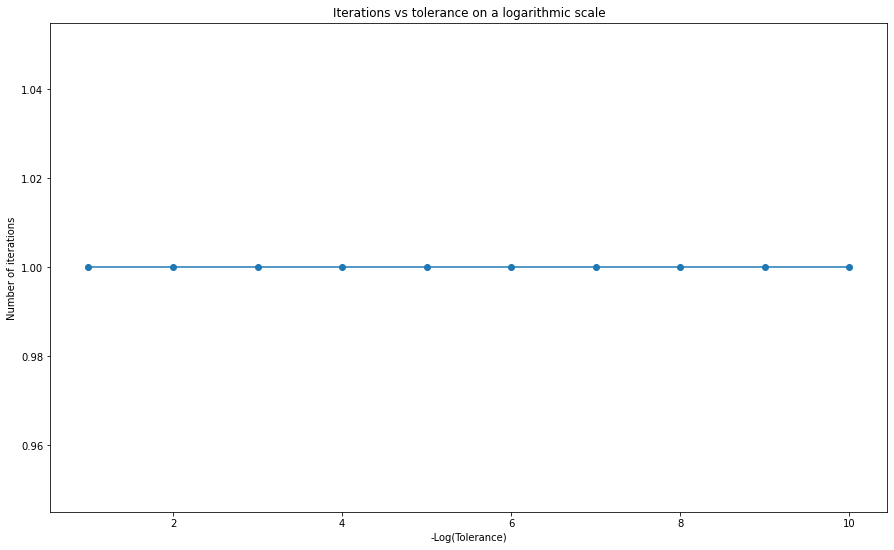

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(range(1,11),iters,marker='o')
plt.xlabel('-Log(Tolerance)')
plt.ylabel('Number of iterations')
plt.title('Iterations vs tolerance on a logarithmic scale')
plt.show()

## 4)

We can see that for all values of tolerance, it took only 1 iteration to reach optimum. This is because the optimal step size directly took us to the exact global minima. Since this function was quadratic,  we could find a closed form expression for the optimal step size, which, by definition, would directly lead to the minima. This approach would not work for higher order functions as we would not get an analytical solution, and we would have to use other methods to get the step size.\
As expected, the number of iterations required are fewer than for a random chosen fixed step size as in Ex1.